In this notebook we will be building a machine learning model using population data to predict heart disease risk.

To do:

* Use Pandas to import the csv data
* One-hot encoding to convert categorical variables into binary form
* Select the best features to use for the model
* Undersample the model to make heart disease vs no heart disease equal
* Random forest model and logistic regression to compare models
* Confusion matrices
* save the model

In [2]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif

import pickle

In [3]:
df = pd.read_csv("../resources/heart_2020_cleaned.csv", encoding = 'utf-8')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
# First list all the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
# List all the unique values for each column
for col in list(df):
    print(col)
    print(df[col].unique())

HeartDisease
['No' 'Yes']
BMI
[16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking
['Yes' 'No']
AlcoholDrinking
['No' 'Yes']
Stroke
['No' 'Yes']
PhysicalHealth
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking
['No' 'Yes']
Sex
['Female' 'Male']
AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity
['Yes' 'No']
GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
SleepTime
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma
['Yes' 'No']
KidneyDisease
['No' 'Yes']
Skin

In [7]:
# Reduce the number of age categories to 3 and the number of diabetic categories to 2
age_cats = ["18 - 34", "35 - 64", "65 or older"]
df.replace({'AgeCategory' : {"18-24" : age_cats[0], 
                             "25-29" : age_cats[0],
                             "30-34" : age_cats[0],
                             "35-39" : age_cats[1],
                             "40-44" : age_cats[1],
                             "45-49" : age_cats[1],
                             "50-54" : age_cats[1],
                             "55-59" : age_cats[1],
                             "60-64" : age_cats[1],
                             "65-69" : age_cats[2],
                             "70-74" : age_cats[2],
                             "75-79" : age_cats[2],
                             "80 or older" : age_cats[2]}}, inplace = True)

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,35 - 64,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,65 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65 or older,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,65 or older,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,35 - 64,White,No,Yes,Very good,8.0,No,No,No


## Use One Hot Encoding and LabelEncoder to encode the categorical variables

In [8]:
# Use LabelEncoder to encode the yes/no columns to 1/0
yesno_columns = ["HeartDisease","Smoking", "AlcoholDrinking", "Stroke", 
               "DiffWalking", "PhysicalActivity", "Asthma",
               "KidneyDisease","SkinCancer", "Diabetic"]

label_encoder=LabelEncoder()

df[yesno_columns]=df[yesno_columns].apply(label_encoder.fit_transform)

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,35 - 64,White,2,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,65 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65 or older,White,2,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,65 or older,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,35 - 64,White,0,1,Very good,8.0,0,0,0


In [9]:
# Put categorical X column names into list
categorical_data = ["Sex", 
               "AgeCategory","Race","GenHealth"]

# Using the list above, create a new df with the encoded columns
encoded_df = pd.get_dummies(df, columns = categorical_data)

# Since the Sex category is binary, we can drop one of the columns to reduce colinearity later on
encoded_df.drop(columns="Sex_Male", inplace = True)

encoded_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,2,1,...,0,0,0,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,2,1,...,0,0,0,0,1,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,0,0,0,0,1,0,0,0,0,1


In [10]:
# Reformat the data into data and target
data = encoded_df.drop("HeartDisease", axis = 1)
target = df.HeartDisease

In [12]:
# Define X and y
X = data
y = target.values.reshape(-1,1)

y = y.ravel()

print(X.shape)
print(y.shape)

(319795, 28)
(319795,)


## Use correlation matrix to visualise how each parameter correlates with one another

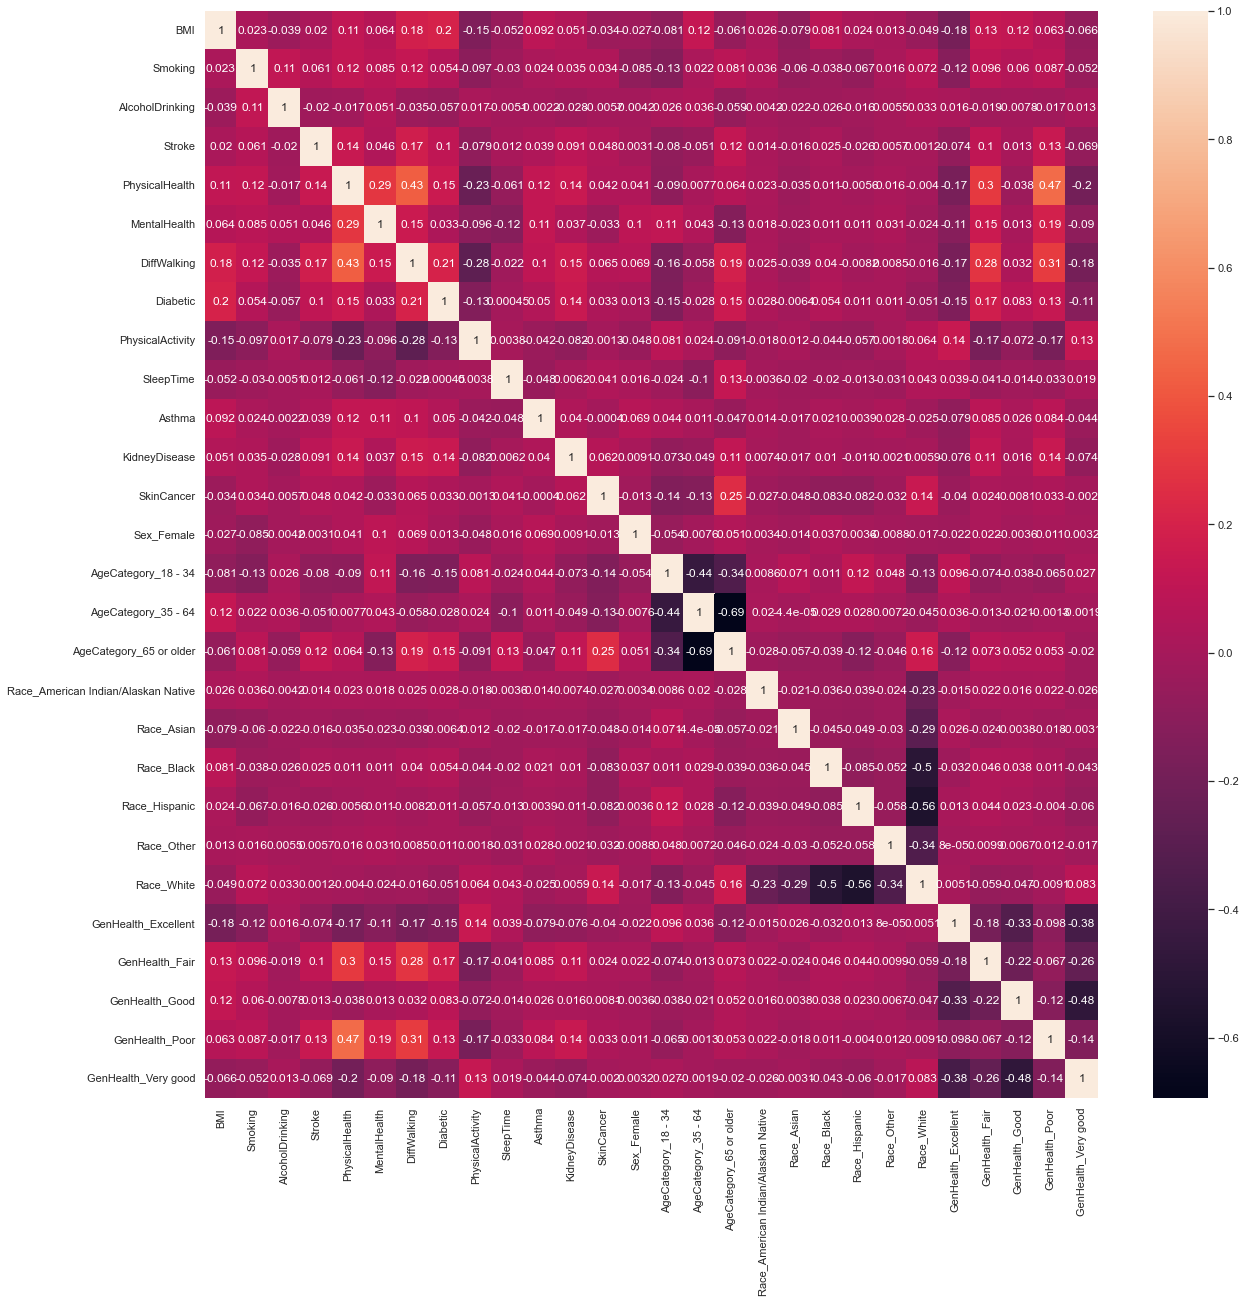

In [13]:
# Create Correlation matrix
corrMatrix = X.corr()

# Visualise the correlation matrix
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

As you can see from the correlation matrix, each parameter is not really correlated with the other, with the exception of the columns that were converted into dummy data (i.e., Age Category, Race, General Health), where each option is negatively correlated with the other options.

There are also too many features, so to reduce overfitting, we will use SelectKBest to select the top 20 features based on feature importance before modelling

## SelectKBest

[ 0  1  3  4  6  7  8 10 11 12 13 14 15 16 22 23 24 25 26 27]


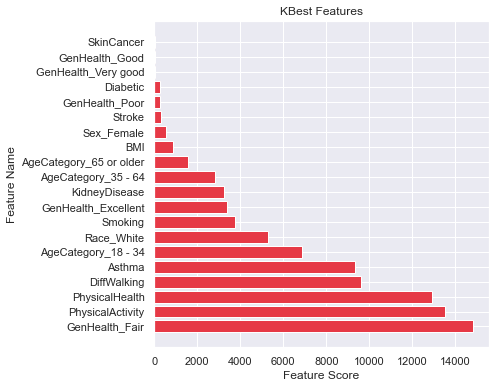

In [14]:
select = SelectKBest(f_classif,k=20)
selected_features=select.fit(X,y)

# Code copied from https://www.kaggle.com/code/julienprost/heart-disease-prediction-lr-knn-rf-training
mask=selected_features.get_support(True)
print(mask)
feature_names=[]

for i in mask:
    feature_names.append(X.columns[i])

scores=selected_features.scores_
named_scores=zip(feature_names,scores)
sorted_named_scores=sorted(named_scores,key=lambda z: z[1],reverse=True)

sorted_scores=[score[1] for score in sorted_named_scores]
sorted_names=[name[0] for name in sorted_named_scores]

y_pos=np.arange(len(feature_names)) 
plt.figure(figsize=(6,6))

plt.barh(y_pos,sorted_scores,height=0.8,align='center',tick_label=sorted_names,color='#E63946')
plt.yticks(y_pos)
plt.xlabel('Feature Score')
plt.ylabel('Feature Name')
plt.title('KBest Features');

## Use Train Test Split

In [15]:
X_new = X[feature_names]

X_new.head()

,BMI,Smoking,Stroke,PhysicalHealth,DiffWalking,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Sex_Female,AgeCategory_18 - 34,AgeCategory_35 - 64,AgeCategory_65 or older,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,16.60,1,0,3.0,0,2,1,1,0,1,1,0,1,0,1,0,0,0,0,1
1,20.34,0,1,0.0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1
2,26.58,1,0,20.0,0,2,1,1,0,0,0,0,0,1,1,0,1,0,0,0
3,24.21,0,0,0.0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0
4,23.71,0,0,28.0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=42, stratify = y)
# stratify=y tells train_test_split to make sure that the training and test datasets 
# contain examples of each class in the same proportions as in the original dataset. 

print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (239846, 20)
X test shape: (79949, 20)
y train shape: (239846,)
y test shape: (79949,)


## Scale the data using StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
# Transform the training and testing data to the scaler
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

## Use Random Undersampling to balance the data between heart disease sample and non heart disease sample

We do this because ~90% of the total data is classified as "No Heart Disease" and only ~10% is classified as "Yes Heart Disease". Since the original dataset is imbalanced, it is good practice to undersample the larger dataset to match the number of cases in the smaller dataset

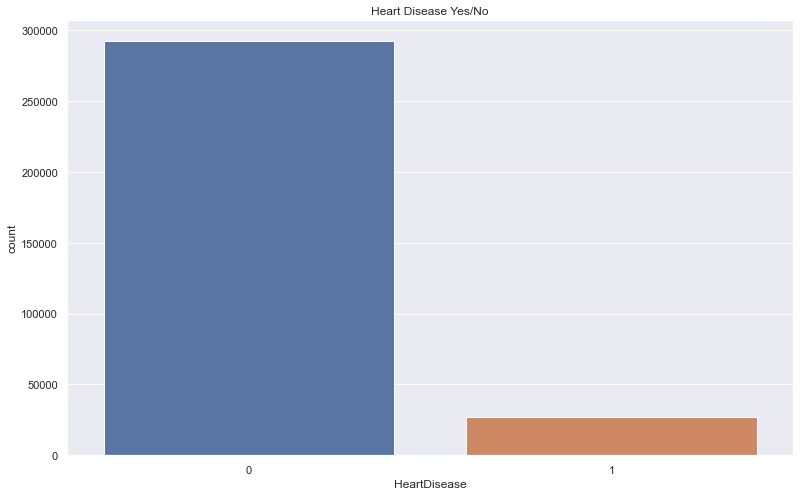

In [19]:
# Plot the distribution of heart disease using sns countplot
sns.set(rc = {'figure.figsize':(13,8)})
sns.countplot(x="HeartDisease", data = df).set(title="Heart Disease Yes/No")
plt.show()

In [20]:
rus = RandomUnderSampler()
X_rus_train, y_rus_train = rus.fit_resample(X_train, y_train)

## We don't resample the testing data

## Create Random Forest model using the target variable as "HeartDisease"

In [22]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100)

rf = rf.fit(X_rus_train, y_rus_train)

In [23]:
# Create predictions
rf_predictions = rf.predict(X_test)

for x in range(0,10,1):
    print(f'Prediction: {rf_predictions[x]}, Actual: {y_test[x]}')

Prediction: 0, Actual: 0
Prediction: 1, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 1, Actual: 0
Prediction: 0, Actual: 0
Prediction: 1, Actual: 0
Prediction: 0, Actual: 0
Prediction: 1, Actual: 0
Prediction: 1, Actual: 1


In [24]:
# Score the training and testing data
print(f"Training Data Score: {rf.score(X_rus_train, y_rus_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")

Training Data Score: 0.9704822211397954
Testing Data Score: 0.6838484533890355


<AxesSubplot:>

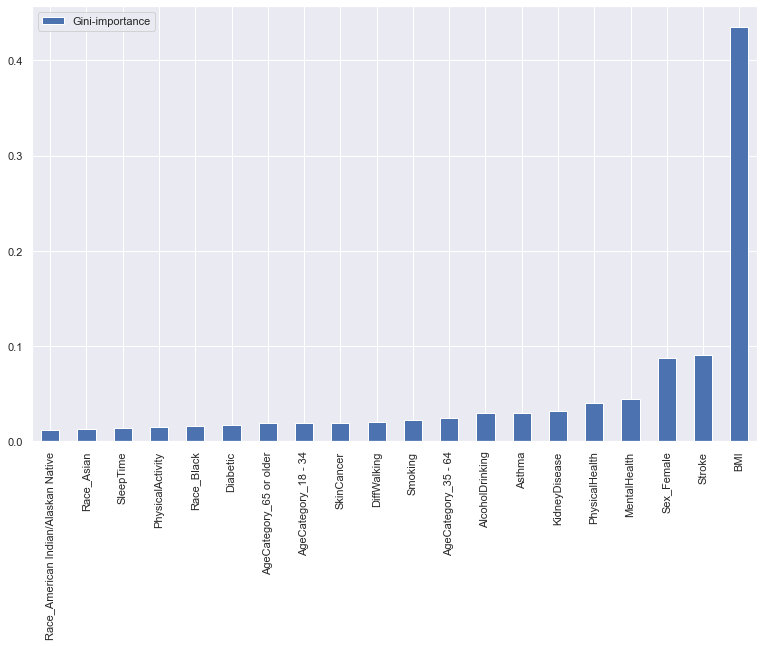

In [25]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)

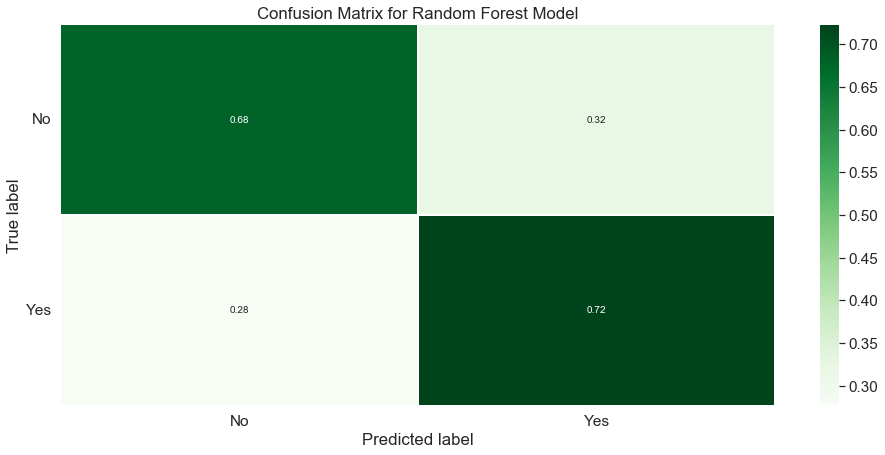

In [26]:
# confusion matrix
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, rf_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['No', "Yes"]
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## Logistic Regression

In [27]:
lg = LogisticRegression(solver = "lbfgs", max_iter = 1000)

lg.fit(X_rus_train, y_rus_train)

LogisticRegression(max_iter=1000)

In [29]:
lg_predictions = lg.predict(X_test)

for x in range(0,10,1):
    print(f'Prediction: {lg_predictions[x]}, Actual: {y_test[x]}')

Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 1, Actual: 0
Prediction: 0, Actual: 0
Prediction: 1, Actual: 0
Prediction: 1, Actual: 1


In [30]:
# Print the r2 score for the test data
print(f"Training Data Score: {lg.score(X_train, y_train)}")
print(f"Testing Data Score: {lg.score(X_test, y_test)}")

Training Data Score: 0.7528455759112097
Testing Data Score: 0.7513039562721234


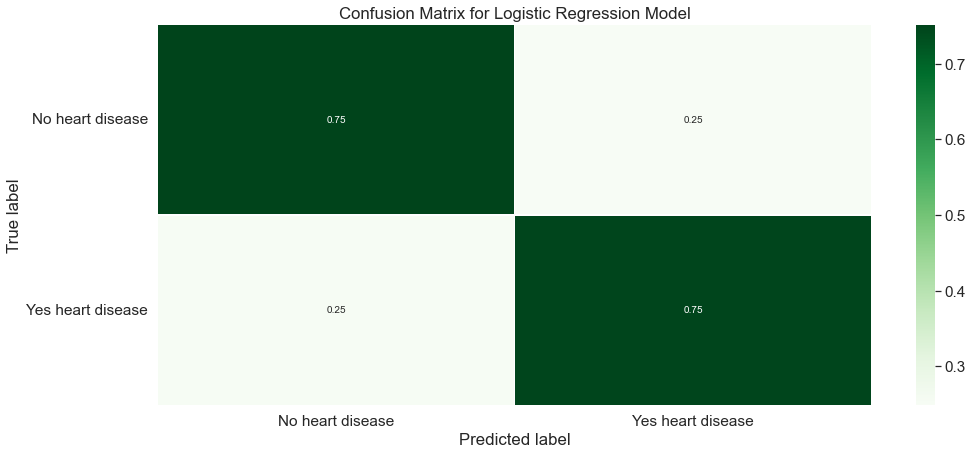

In [31]:
# confusion matrix
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, lg_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['No heart disease', "Yes heart disease"]
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

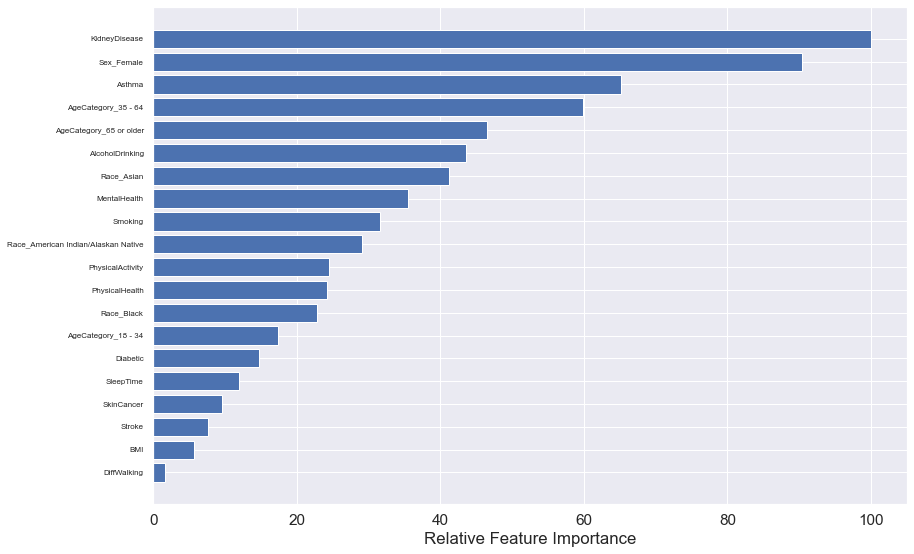

In [32]:
feature_importance = abs(lg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

## Conclusion

Logistic regression model is performing with a higher accuracy, therefore we will save this model to use in our app.

In [33]:
# predict test
lg.predict(X_test[:1])

array([0])

In [36]:
# save the models
filename = 'models/finalized_model.sav'
filename_le = 'models/label_encoder.sav'
filename_scaler = 'models/standard_scaler.sav'

pickle.dump(lg, open(filename, 'wb'))
pickle.dump(label_encoder, open(filename_le, 'wb'))
pickle.dump(scaler, open(filename_scaler, 'wb'))


# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)


0.7513039562721234
